In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics.pairwise import haversine_distances
from math import radians

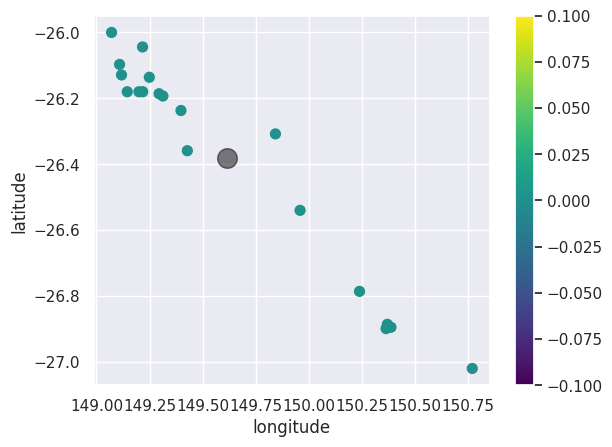

Greatest distance with 1 towers: 135.01946022898133


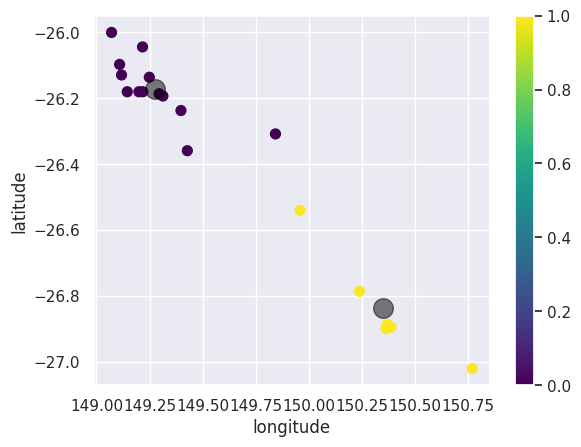

Greatest distance with 2 towers: 58.50003338466448


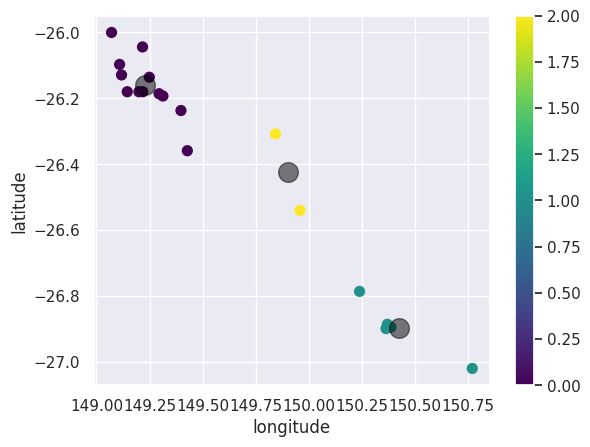

Greatest distance with 3 towers: 36.76829614681917


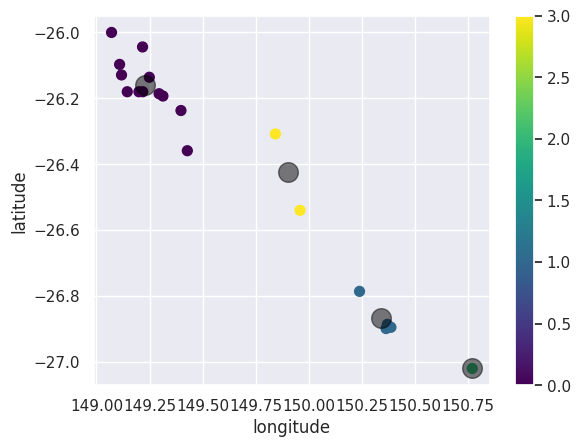

Greatest distance with 4 towers: 29.676825467645813


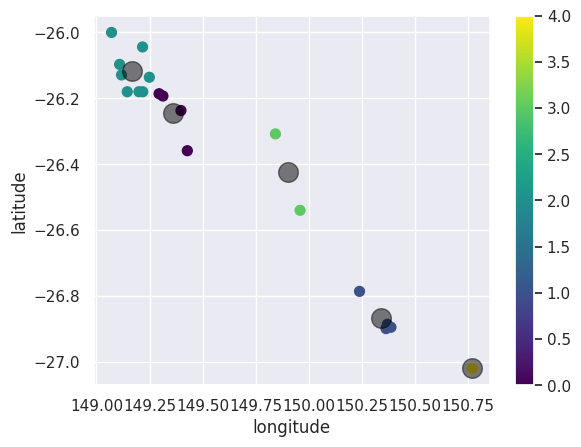

Greatest distance with 5 towers: 16.226407729348075


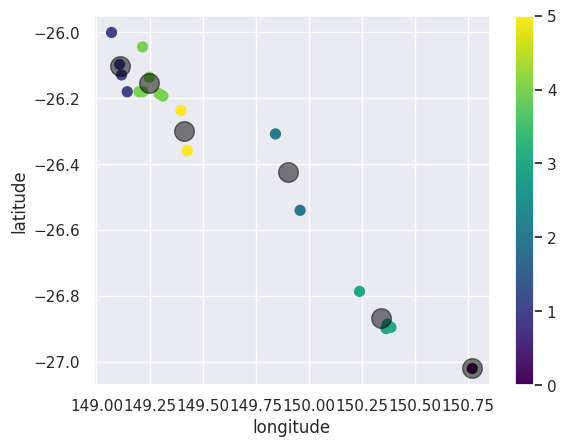

Greatest distance with 6 towers: 14.149632755922497


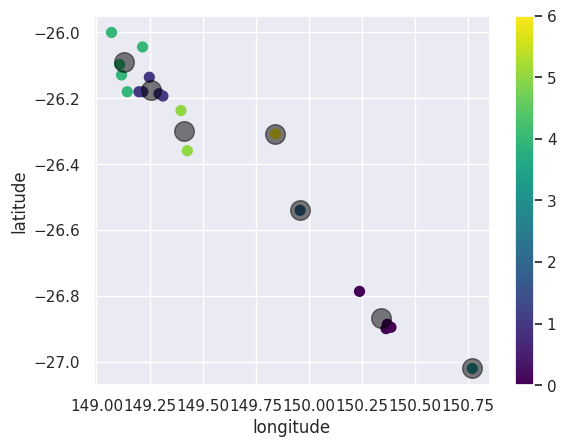

Greatest distance with 7 towers: 13.452497461911232


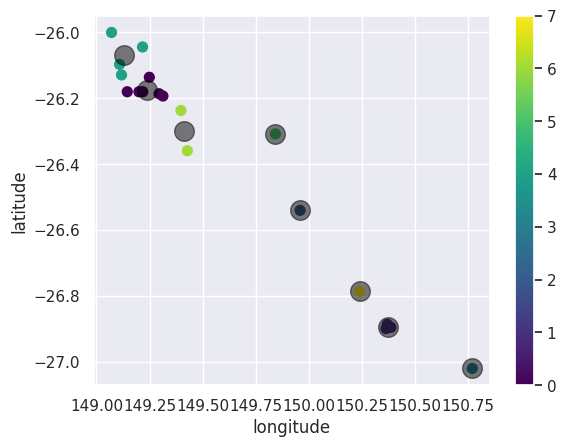

Greatest distance with 8 towers: 9.477772205425284


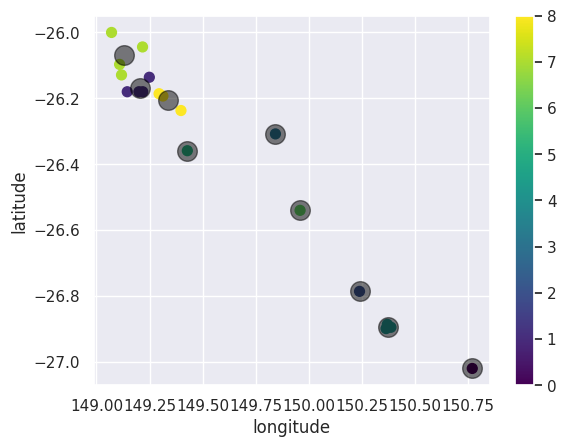

Greatest distance with 9 towers: 9.477772205425284


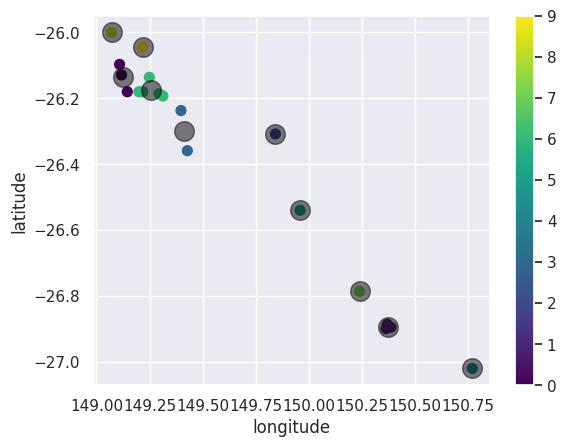

Greatest distance with 10 towers: 6.953620886295235


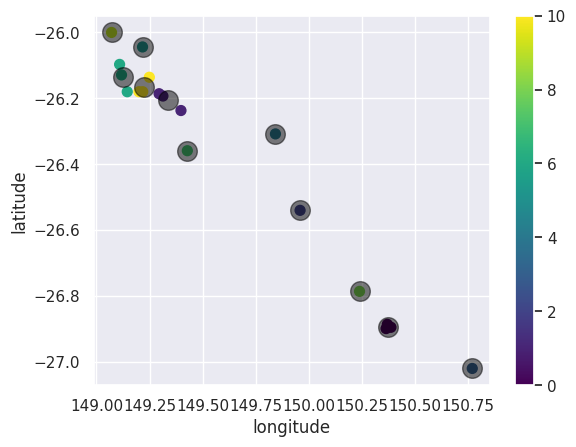

Greatest distance with 11 towers: 7.182684551244726


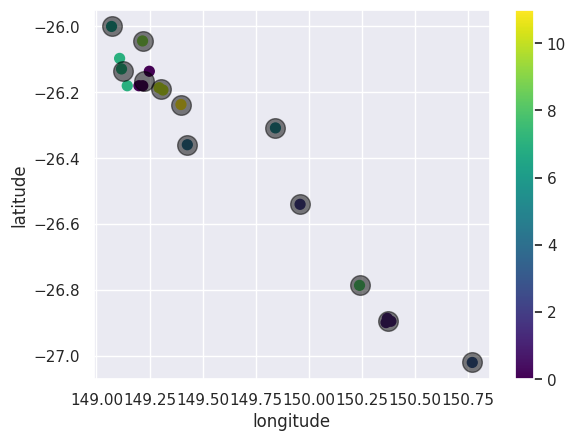

Greatest distance with 12 towers: 5.396878782081837


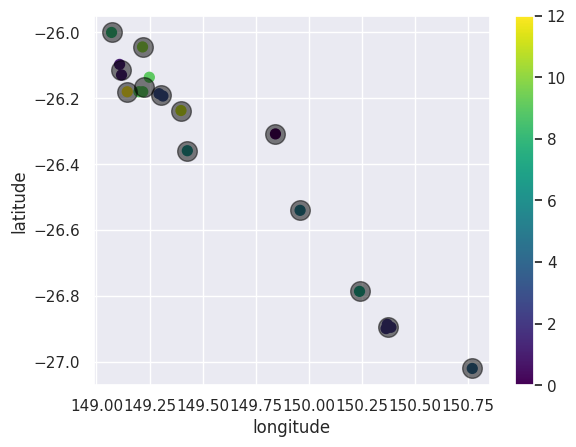

Greatest distance with 13 towers: 4.214623056859506


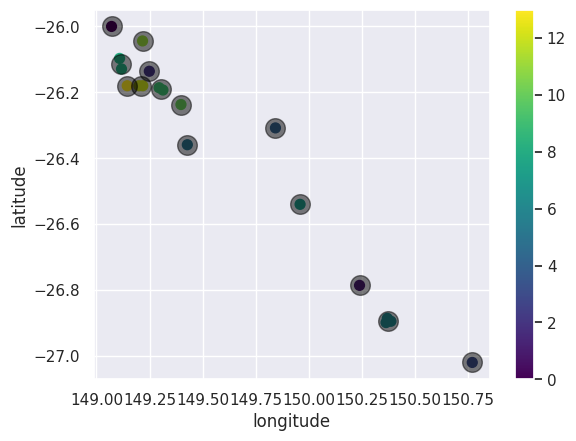

Greatest distance with 14 towers: 1.83703903995516


In [8]:
def rad_conv(lat, long):
    return [radians(x) for x in (lat, long)]

def tower_dist(row, tower_lat, tower_lon):
    haversine_array = haversine_distances([rad_conv(row['latitude'], row["longitude"]), rad_conv(tower_lat, tower_lon)])*6378.137
    return haversine_array[0][1]

def calc_optimal_tower_locations(frame, num_towers):
    df=frame.copy(deep=True)

    kmeans = KMeans(n_clusters = num_towers, init ='k-means++', n_init=10)
    kmeans.fit(df[["longitude", "latitude"]])
    
    df['cluster_label'] = kmeans.fit_predict(df[["longitude", "latitude"]])
    
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    labels = kmeans.predict(df[["longitude", "latitude"]]) # Labels of each point

    df["min_dist"] = df.apply(lambda row: min([tower_dist(row, center[1], center[0]) for center in centers]), axis=1)

    df.plot.scatter(x = 'longitude', y = 'latitude', c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
    plt.show()

    print(f"Greatest distance with {num_towers} towers: {max(list(df['min_dist']))}")

    return centers


wells = pd.read_csv('field_locations.csv')
wells.rename(columns={"x_coord": "longitude", "y_coord": "latitude"}, inplace=True)

towers = {x: calc_optimal_tower_locations(wells, x) for x in range(1, 15)}














In [4]:
def print_optimal_tower_locations(frame, num_towers):
    df=frame.copy(deep=True)

    kmeans = KMeans(n_clusters = num_towers, init ='k-means++', n_init=10)
    kmeans.fit(df[["longitude", "latitude"]])
    
    df['cluster_label'] = kmeans.fit_predict(df[["longitude", "latitude"]])
    
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    print(centers)

print_optimal_tower_locations(wells, 10)

[[150.77       -27.02      ]
 [149.33533333 -26.20533333]
 [149.959      -26.54      ]
 [150.37366667 -26.89333333]
 [149.09933333 -26.07533333]
 [149.843      -26.308     ]
 [149.428      -26.359     ]
 [150.239      -26.786     ]
 [149.203      -26.169     ]
 [149.217      -26.044     ]]


/home/oliver/emu/iot/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


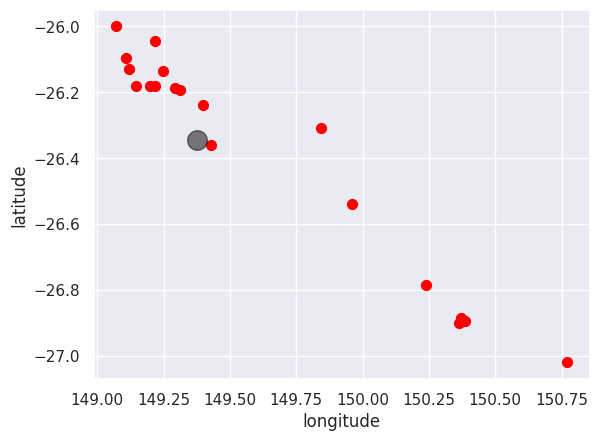

In [7]:


wells = pd.read_csv('field_locations.csv')
wells.rename(columns={"x_coord": "longitude", "y_coord": "latitude"}, inplace=True)

reedy_creek = [149.375439, -26.343901]

wells.plot.scatter(x = 'longitude', y = 'latitude', c="red", s=50, cmap='viridis')
plt.scatter(reedy_creek[0], reedy_creek[1], c="black", s=200, alpha=0.5)
plt.show()